# Melanoma Detection using CNN
## Problem statement: 
- To build a CNN based model which can accurately detect melanoma. 
- Melanoma is a type of cancer that can be deadly if not detected early. 
- It accounts for 75% of skin cancer deaths. 
- A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

# Submitted by:
# Shubhanshu Kumar Singh
# IIITB Roll No : EML21100082
# Applicant ID : APFE21709564

### Importing all the important libraries

In [122]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [2]:
# tf.debugging.set_log_device_placement(True)

In [3]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

### Importing Skin Cancer Data
#### Take necessary actions to read the data

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("./Train")
data_dir_test = pathlib.Path("./Test")

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writing the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Metal device set to: Apple M1 Pro


2022-05-17 23:55:21.296172: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-17 23:55:21.296439: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Create a code to visualize one instance of all the nine classes present in the dataset

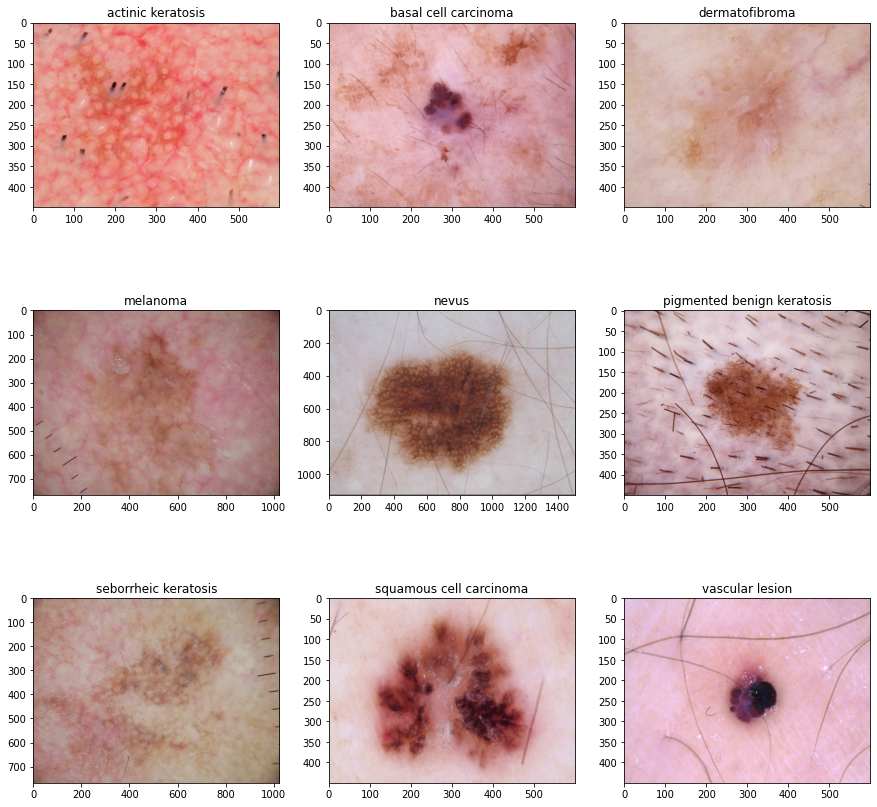

In [10]:
### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(15,15))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Create a CNN model, which can accurately detect 9 classes present in the dataset. 
Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [31]:
### Your code goes here
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [32]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [33]:
# View the summary of all layers
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_29 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 conv2d_30 (Conv2D)          (None, 180, 180, 16)      2320      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 conv2d_32 (Conv2D)          (None, 90, 90, 32)        9248      
                                                      

### Train the model

In [34]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


2022-05-18 00:09:21.775433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 [==============================] - ETA: 0s - loss: 2.0813 - accuracy: 0.1987

2022-05-18 00:09:25.558843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 [==============================] - 4s 71ms/step - loss: 2.0813 - accuracy: 0.1987 - val_loss: 2.0249 - val_accuracy: 0.2058
Epoch 2/30
56/56 [==============================] - 4s 68ms/step - loss: 2.0227 - accuracy: 0.1925 - val_loss: 2.0238 - val_accuracy: 0.1924
Epoch 3/30
56/56 [==============================] - 4s 68ms/step - loss: 1.9595 - accuracy: 0.2556 - val_loss: 1.9376 - val_accuracy: 0.2841
Epoch 4/30
56/56 [==============================] - 4s 68ms/step - loss: 1.8878 - accuracy: 0.2874 - val_loss: 1.9180 - val_accuracy: 0.2685
Epoch 5/30
56/56 [==============================] - 4s 68ms/step - loss: 1.7729 - accuracy: 0.3404 - val_loss: 1.8073 - val_accuracy: 0.3199
Epoch 6/30
56/56 [==============================] - 4s 68ms/step - loss: 1.7358 - accuracy: 0.3627 - val_loss: 1.8382 - val_accuracy: 0.3087
Epoch 7/30
56/56 [==============================] - 4s 68ms/step - loss: 1.6739 - accuracy: 0.3661 - val_loss: 1.7245 - val_accuracy: 0.3535
Epoch 8/30
56/56 [======

### Visualizing training results

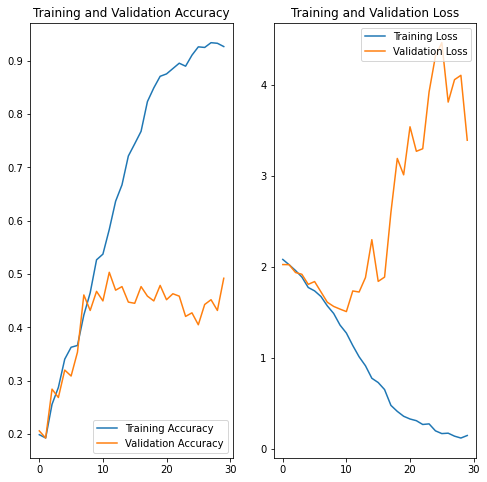

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

**Finding on the first base model**

- The plots show that training accuracy and validation accuracy are off by large margins, and the model has achieved only around 49% accuracy on the validation set.

- Let's inspect what went wrong and try to increase the overall performance of the model.

- In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 49% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of overfitting.

- When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

- There are multiple ways to fight overfitting in the training process. In this tutorial, you'll use data augmentation and add Dropout to your model.

### Data augmentation

- Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

- We will implement data augmentation using the following Keras preprocessing layers: **tf.keras.layers.RandomFlip**, **tf.keras.layers.RandomRotation**, and **tf.keras.layers.RandomZoom**. These can be included inside your model like other layers, and run on the GPU.

In [36]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
with tf.device('/CPU:0'):
    data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

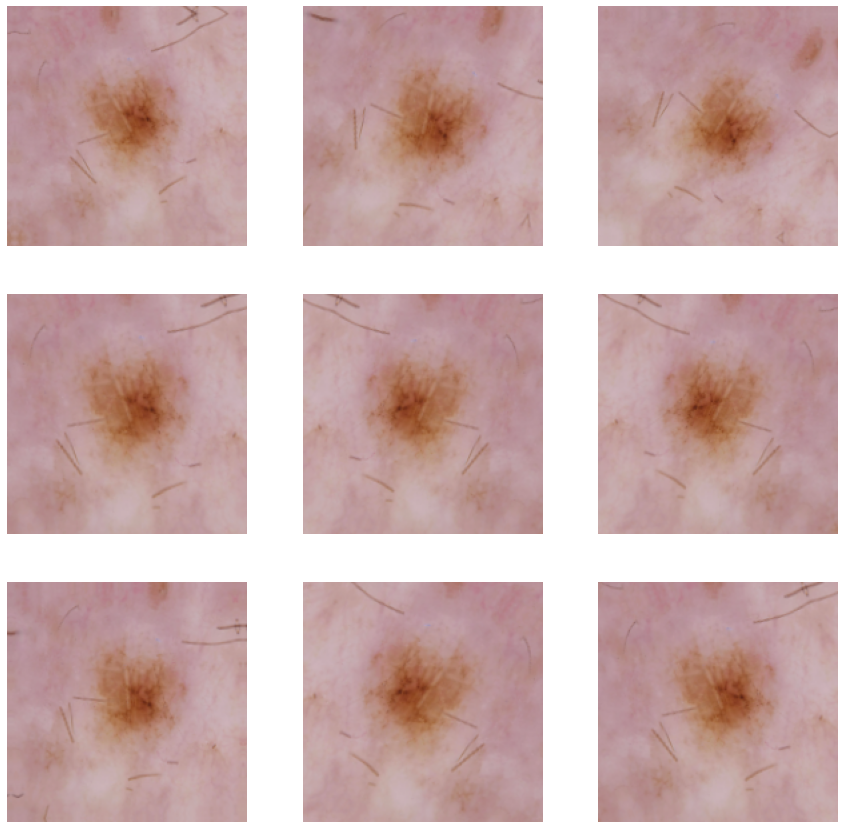

In [37]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
with tf.device('/CPU:0'):
    # Todo, visualize how your augmentation strategy works for one instance of training image.
    plt.figure(figsize=(15, 15))
    for images, _ in train_ds.take(1):
      for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Create the model, compile and train the model


In [65]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_classes = 9
model = Sequential([data_augmentation,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes, activation = "softmax"))

### Compiling the model

In [66]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Training the model

In [67]:
## Your code goes here, note: train your model for 30 epochs
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


2022-05-18 00:53:04.367324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 [==============================] - ETA: 0s - loss: 2.0689 - accuracy: 0.2087

2022-05-18 00:53:09.920142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 [==============================] - 6s 102ms/step - loss: 2.0689 - accuracy: 0.2087 - val_loss: 2.0112 - val_accuracy: 0.2058
Epoch 2/30
56/56 [==============================] - 5s 90ms/step - loss: 1.9712 - accuracy: 0.2573 - val_loss: 1.9232 - val_accuracy: 0.3154
Epoch 3/30
56/56 [==============================] - 5s 90ms/step - loss: 1.8772 - accuracy: 0.2930 - val_loss: 1.7912 - val_accuracy: 0.3221
Epoch 4/30
56/56 [==============================] - 5s 91ms/step - loss: 1.7803 - accuracy: 0.3276 - val_loss: 1.7241 - val_accuracy: 0.3289
Epoch 5/30
56/56 [==============================] - 5s 90ms/step - loss: 1.6659 - accuracy: 0.3767 - val_loss: 1.6519 - val_accuracy: 0.3714
Epoch 6/30
56/56 [==============================] - 5s 89ms/step - loss: 1.5807 - accuracy: 0.4241 - val_loss: 1.5916 - val_accuracy: 0.4072
Epoch 7/30
56/56 [==============================] - 5s 89ms/step - loss: 1.5875 - accuracy: 0.4381 - val_loss: 1.8338 - val_accuracy: 0.3065
Epoch 8/30
56/56 [=====

### Visualizing the results

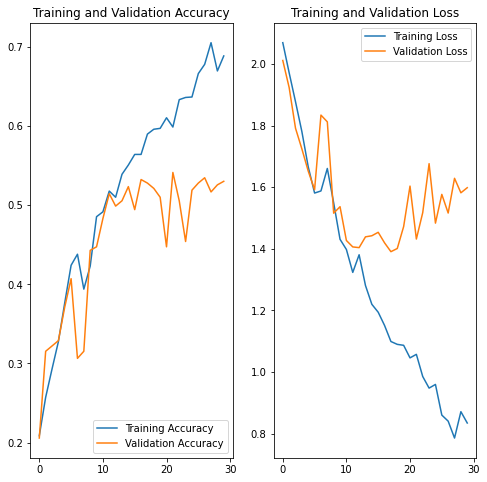

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

- After applying data augmentation and tf.keras.layers.Dropout, there is less overfitting than before, and training and validation accuracy are somewhat close to each other.
- We might try increasing the number of epochs for accuracy improvement.

#### Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [69]:
##
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Train/actinic keratosis/ISIC_0029460.jpg,actinic keratosis
1,Train/actinic keratosis/ISIC_0031993.jpg,actinic keratosis
2,Train/actinic keratosis/ISIC_0029500.jpg,actinic keratosis
3,Train/actinic keratosis/ISIC_0026626.jpg,actinic keratosis
4,Train/actinic keratosis/ISIC_0032135.jpg,actinic keratosis
...,...,...
2234,Train/vascular lesion/ISIC_0032919.jpg,vascular lesion
2235,Train/vascular lesion/ISIC_0033031.jpg,vascular lesion
2236,Train/vascular lesion/ISIC_0031197.jpg,vascular lesion
2237,Train/vascular lesion/ISIC_0030882.jpg,vascular lesion


In [120]:
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

<BarContainer object of 9 artists>

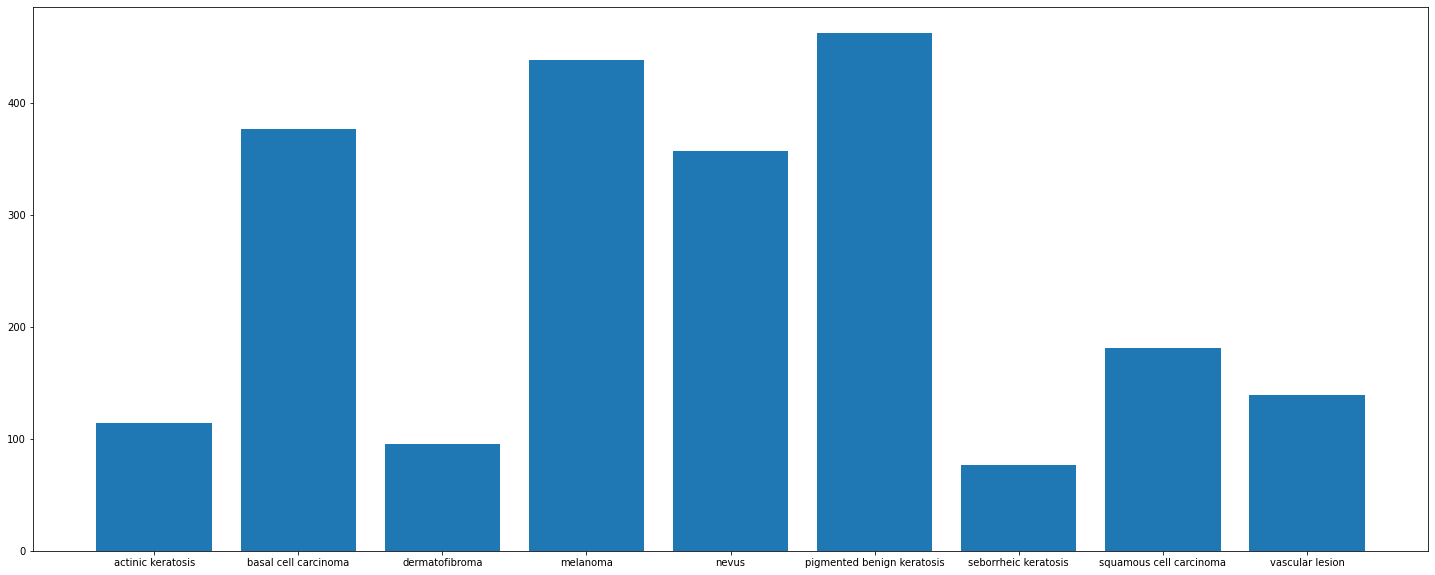

In [70]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### Write your findings here: 
#### - Which class has the least number of samples?
- **seborrheic keratosis** has least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
- **melanoma** and **pigmented benign keratosis** have proprtionate number of classes

#### Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [71]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [72]:
path_to_training_dataset="./Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset+"/"+i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to ./Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x161AECF10>: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 323.47 Samples/s]


Initialised with 376 image(s) found.
Output directory set to ./Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x161B1FE80>: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 324.78 Samples/s]


Initialised with 95 image(s) found.
Output directory set to ./Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x161ADE7F0>: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 326.64 Samples/s]


Initialised with 438 image(s) found.
Output directory set to ./Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x161ADED60>: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:07<00:00, 63.69 Samples/s]


Initialised with 357 image(s) found.
Output directory set to ./Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1019x717 at 0x32A27C8E0>: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:06<00:00, 75.40 Samples/s]


Initialised with 462 image(s) found.
Output directory set to ./Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x3345315B0>: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 312.46 Samples/s]


Initialised with 77 image(s) found.
Output directory set to ./Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x167FF5040>: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 150.94 Samples/s]


Initialised with 181 image(s) found.
Output directory set to ./Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2F65ACDF0>: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 313.73 Samples/s]


Initialised with 139 image(s) found.
Output directory set to ./Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x16C8AA880>: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 312.44 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [73]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [80]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Train/melanoma/output/melanoma_original_ISIC_0009898.jpg_2d442395-081d-4944-8aa4-05a3777423d1.jpg',
 'Train/melanoma/output/melanoma_original_ISIC_0010934.jpg_8e353fd2-328f-45d2-ad7f-e7aca06c3e9f.jpg',
 'Train/melanoma/output/melanoma_original_ISIC_0010783.jpg_27d064ef-1400-41cd-bdf9-88eb3244029a.jpg',
 'Train/melanoma/output/melanoma_original_ISIC_0010809.jpg_d1612461-7cf1-4b90-a730-842c313c4699.jpg',
 'Train/melanoma/output/melanoma_original_ISIC_0009918.jpg_0ee6ac00-bc4a-4f0c-8a99-1f605dceef12.jpg',
 'Train/melanoma/output/melanoma_original_ISIC_0010119.jpg_3a095273-314f-4617-95eb-a1a1fb4f0a23.jpg',
 'Train/melanoma/output/melanoma_original_ISIC_0000554.jpg_e55b982e-c6e3-4c97-88f0-239ea5ab3cd4.jpg',
 'Train/melanoma/output/melanoma_original_ISIC_0000305.jpg_353e9e2d-f059-4a7b-bc1c-830d236c69c0.jpg',
 'Train/melanoma/output/melanoma_original_ISIC_0010119.jpg_d705fe2f-1359-436c-9759-3ba449f33264.jpg',
 'Train/melanoma/output/melanoma_original_ISIC_0000414.jpg_2a08cdc9-5e1c-4d13-87fc

In [81]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [87]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [88]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df,df2])

In [89]:
new_df.reset_index(drop=True)

,Path,Label
0,Train/actinic keratosis/ISIC_0029460.jpg,actinic keratosis
1,Train/actinic keratosis/ISIC_0031993.jpg,actinic keratosis
2,Train/actinic keratosis/ISIC_0029500.jpg,actinic keratosis
3,Train/actinic keratosis/ISIC_0026626.jpg,actinic keratosis
4,Train/actinic keratosis/ISIC_0032135.jpg,actinic keratosis
...,...,...
6734,Train/dermatofibroma/output/dermatofibroma_ori...,dermatofibroma
6735,Train/dermatofibroma/output/dermatofibroma_ori...,dermatofibroma
6736,Train/dermatofibroma/output/dermatofibroma_ori...,dermatofibroma
6737,Train/dermatofibroma/output/dermatofibroma_ori...,dermatofibroma


In [90]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [91]:
batch_size = 32
img_height = 180
img_width = 180

In [92]:
data_dir_train=pathlib.Path("./Train")

#### Create a training dataset

In [93]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [94]:
train_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### Create a validation dataset

In [95]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Create your model (make sure to include normalization)

In [111]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_classes = 9
model = Sequential([data_augmentation,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes, activation = "softmax"))

In [112]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_17 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_118 (Conv2D)         (None, 180, 180, 16)      448       
                                                                 
 conv2d_119 (Conv2D)         (None, 180, 180, 16)      2320      
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_120 (Conv2D)         (None, 90, 90, 32)        4640      
                                                     

#### Compile your model (Choose optimizer and loss function appropriately)

In [113]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#### Train your model

In [114]:
## Your code goes here, note: train your model for 100 epochs
import time
epochs = 100
a = time.time()
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
b = time.time()
print("Total Time taken: ",str(b-a))

Epoch 1/100


2022-05-18 01:37:22.217716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


169/169 [==============================] - ETA: 0s - loss: 2.1812 - accuracy: 0.1461

2022-05-18 01:37:38.961674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


169/169 [==============================] - 20s 110ms/step - loss: 2.1812 - accuracy: 0.1461 - val_loss: 2.1350 - val_accuracy: 0.1633
Epoch 2/100
169/169 [==============================] - 19s 108ms/step - loss: 1.8958 - accuracy: 0.2589 - val_loss: 1.9291 - val_accuracy: 0.2687
Epoch 3/100
169/169 [==============================] - 19s 108ms/step - loss: 1.7174 - accuracy: 0.3386 - val_loss: 1.6618 - val_accuracy: 0.3838
Epoch 4/100
169/169 [==============================] - 19s 108ms/step - loss: 1.6165 - accuracy: 0.3833 - val_loss: 1.6558 - val_accuracy: 0.4001
Epoch 5/100
169/169 [==============================] - 19s 108ms/step - loss: 1.5361 - accuracy: 0.4106 - val_loss: 1.4730 - val_accuracy: 0.4232
Epoch 6/100
169/169 [==============================] - 19s 109ms/step - loss: 1.4471 - accuracy: 0.4332 - val_loss: 1.4120 - val_accuracy: 0.4640
Epoch 7/100
169/169 [==============================] - 19s 111ms/step - loss: 1.3963 - accuracy: 0.4486 - val_loss: 1.3503 - val_accurac

Epoch 57/100
169/169 [==============================] - 19s 108ms/step - loss: 0.4395 - accuracy: 0.8312 - val_loss: 0.5392 - val_accuracy: 0.8055
Epoch 58/100
169/169 [==============================] - 19s 108ms/step - loss: 0.4221 - accuracy: 0.8309 - val_loss: 0.5455 - val_accuracy: 0.8151
Epoch 59/100
169/169 [==============================] - 19s 108ms/step - loss: 0.3988 - accuracy: 0.8422 - val_loss: 0.5276 - val_accuracy: 0.8226
Epoch 60/100
169/169 [==============================] - 19s 108ms/step - loss: 0.4024 - accuracy: 0.8427 - val_loss: 0.5919 - val_accuracy: 0.7929
Epoch 61/100
169/169 [==============================] - 19s 108ms/step - loss: 0.4427 - accuracy: 0.8279 - val_loss: 0.6175 - val_accuracy: 0.7869
Epoch 62/100
169/169 [==============================] - 19s 110ms/step - loss: 0.4024 - accuracy: 0.8487 - val_loss: 0.5485 - val_accuracy: 0.8092
Epoch 63/100
169/169 [==============================] - 19s 109ms/step - loss: 0.3777 - accuracy: 0.8520 - val_loss: 0

#### Visualize the model results

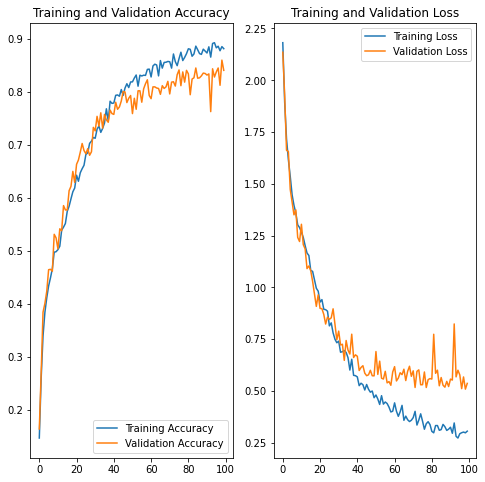

In [115]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

- Train Accuracy: 88.13%
- Validation Accuracy: 84.04%
- Accuracy on training data has increased by using Augmentor library.
- Model is not overfitting. Train and Validation Accuracies are close to each other.
- The problem of overfitting has been solved by adding more layers and dropout and increasing the total no. of epochs (100 in this case).
- The Model can be further improved by tuning the architecture and total no. of epochs.